# Principal Component Analysis

Note, often the Principal Component Analysis is not done via eigenvalue decomposition but via singular value decomposition because eigenvalues are only defined for square matrices due to $Av=\lambda v$ which is only possible if $A \in R^{(n,n)}$, so that the resulting vector still the same dimension as the input vector. Singular value decomposition is also defined for non-square matrices.

In [1]:
from PIL import Image
from numpy import asarray
import numpy as np

## Preprocessing

non-square image with dimension (190, 190)


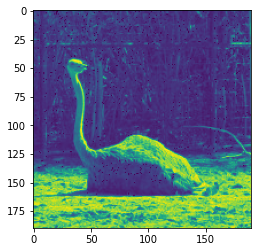

In [2]:
import matplotlib.pyplot as plt

image_name = "img.jpg"
image = asarray(Image.open(image_name))
# downsample image and only take color channel 1
# image=image[:102*5:5,::5,1] if square image is needed
image = image[:, :, 1]
image[image == image[0, 0]] = 0
image = np.array(image, dtype=float)
image -= np.mean(image)
print(f"non-square image with dimension {image.shape}")
plt.imshow(image)

## Principal Component Analysis on Matrix Representation

In [3]:
from sklearn.covariance import LedoitWolf

# covariance_matrix = LedoitWolf().fit(image).covariance_ #numerically more stable
covariance_matrix = np.cov(image)

In [4]:
# ew=vector of eigenvalues, ev=matrix with eigenvectors
ew, ev = np.linalg.eig(covariance_matrix)

# only take real part
ew = np.real(ew)
ev = np.real(ev)

In [5]:
mask_sort_ew = np.argsort(ew)[::-1]  # starting with the biggest eigenvalues
ew = ew[mask_sort_ew]
ev = ev[mask_sort_ew]

## Reconstruction

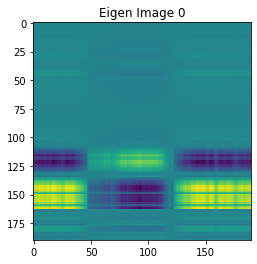

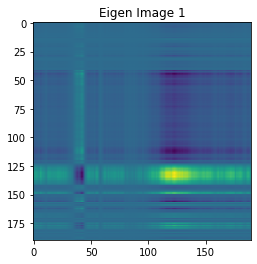

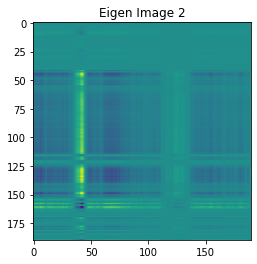

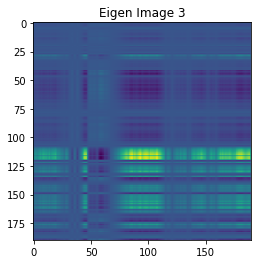

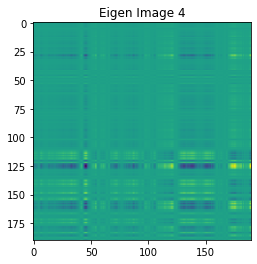

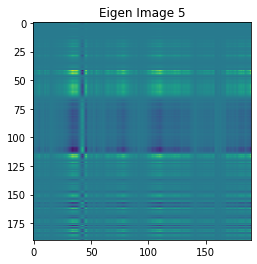

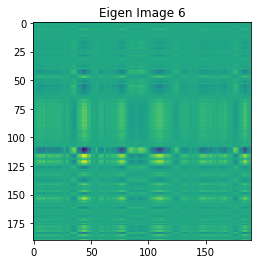

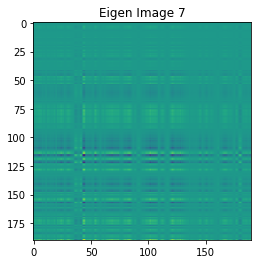

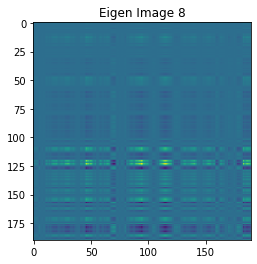

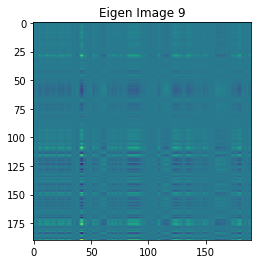

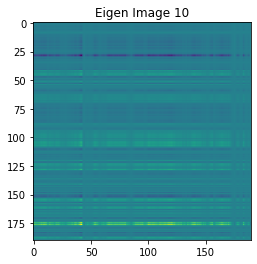

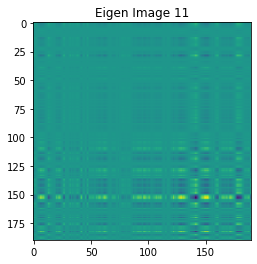

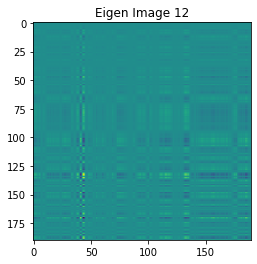

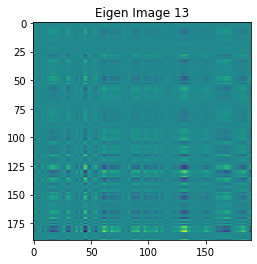

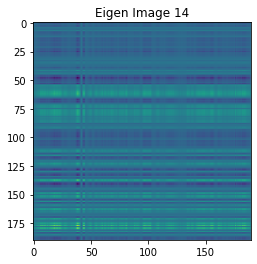

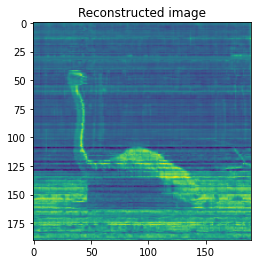

floats needed: 13300 original image: 36100


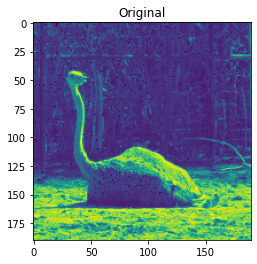

In [6]:
reconstructed_image = np.zeros_like(image, dtype=float)
num_ev_to_consider = 40  # more eigenvectors will result in better reconstruction
for i in range(num_ev_to_consider):
    # M=M*one=(\sum_k|E_k>)<E_k|)=\sum_k M|E_k><E_k|
    # eigen_image_i=np.real(np.dot(np.matmul(image, ev[:, i:i+1]), ev[:, i:i+1].T))

    # alternatively introduce the 1 = \sum_k|E_k>)<E_k| on the other side,
    # fits nicely in bra-ket notation res=\sum_k |E_k><E_k|M
    eigen_image_i = np.real(
        np.matmul(ev[:, i : i + 1], np.matmul(ev[:, i : i + 1].T, image))
    )

    reconstructed_image += eigen_image_i
    if i < 15:
        plt.imshow(eigen_image_i)
        plt.title(f"Eigen Image {i}")
        plt.show()

plt.imshow(reconstructed_image)
plt.title("Reconstructed image")
plt.show()

len_ev = ev.shape[0]
print(
    f"floats needed: {np.prod(ev[:,:30].shape)+len_ev*num_ev_to_consider} original image: {np.prod(image.shape)}"
)
plt.imshow(image)
plt.title("Original")
plt.show()

## Alternative, work with flattened representation

In [7]:
image = asarray(Image.open(image_name))
image = np.array(image[:, :, 1], dtype=float)
image -= np.mean(image)
feature_vector = np.reshape(image[::5, ::5], (-1, 1))
feature_vector -= np.mean(feature_vector)
original_shape = image[::5, ::5].shape

In [8]:
cov_matrix = np.cov(np.dot(feature_vector, feature_vector.T))

In [9]:
ew, ev = np.linalg.eig(cov_matrix)

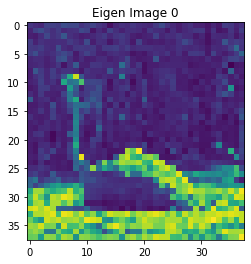

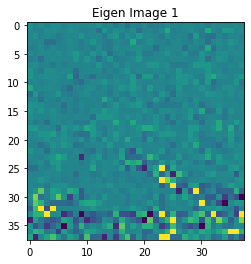

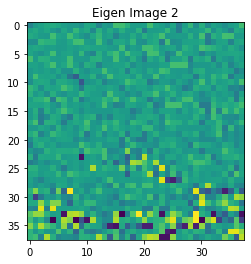

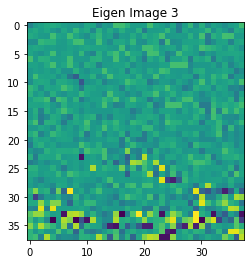

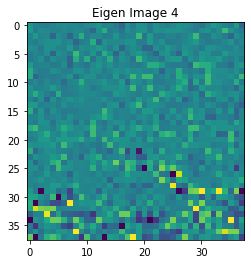

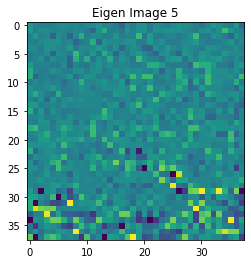

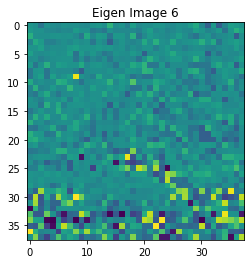

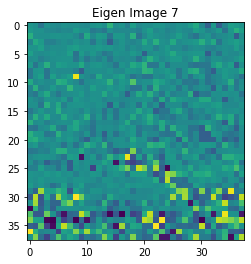

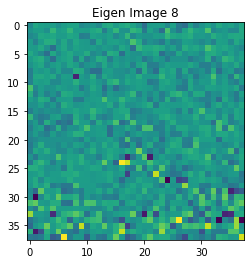

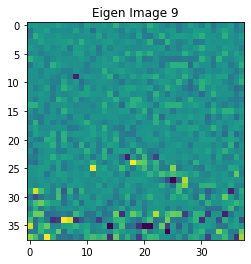

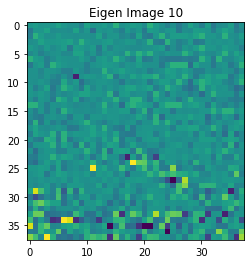

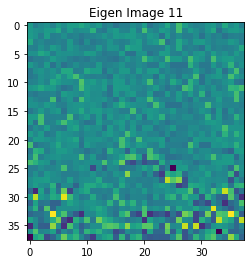

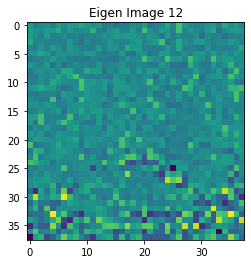

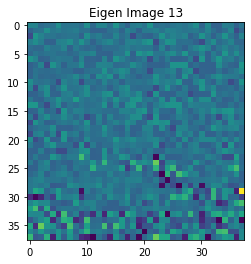

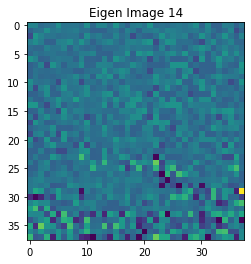

In [10]:
num_ev_to_consider = 60  # more eigenvectors will result in better reconstruction
reconstructed_image = np.zeros(original_shape)
for i in range(num_ev_to_consider):
    eigen_image_i = np.real(
        np.matmul(ev[:, i : i + 1], np.matmul(ev[:, i : i + 1].T, feature_vector))
    )
    eigen_image_i = np.reshape(eigen_image_i, original_shape)
    reconstructed_image += eigen_image_i
    if i < 15:
        plt.imshow(eigen_image_i)
        plt.title(f"Eigen Image {i}")
        plt.show()

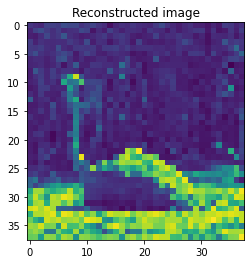

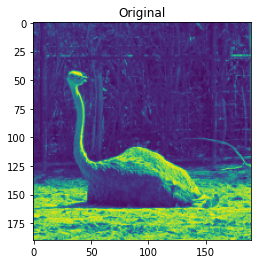

In [11]:
plt.imshow(reconstructed_image)
plt.title("Reconstructed image")
plt.show()

plt.imshow(image)
plt.title("Original")
plt.show()